<a href="https://colab.research.google.com/github/TheDataNes/Coursera_Capstone./blob/master/Geographical_cluster_of_the_possible_COVID_19_infection_points_in_M%C3%A9xico_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the Open Cage API Library
!pip install opencage

In [0]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim 
from opencage.geocoder import OpenCageGeocode
import folium 
from folium import FeatureGroup, LayerControl, Map, Marker

import json
import requests
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize 

In [31]:
COVID_CDMX = pd.read_csv('/content/drive/My Drive/DataSets/COVID-19 CDMX Update.csv')
#you can download the data from the follow link:
# https://datos.cdmx.gob.mx/explore/dataset/casos-asociados-a-covid-19/export/?disjunctive.resultado&disjunctive.negativo&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImNhc29zLWFzb2NpYWRvcy1hLWNvdmlkLTE5Iiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5yZXN1bHRhZG8iOnRydWUsImRpc2p1bmN0aXZlLm5lZ2F0aXZvIjp0cnVlfX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6InNwbGluZSIsImZ1bmMiOiJTVERERVYiLCJ5QXhpcyI6Im51bV9mYWxsZWNpZG9zIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoicmFuZ2UtQWNjZW50In1dLCJ4QXhpcyI6ImZlY2hhX3NpbnRvbWFzIiwibWF4cG9pbnRzIjoiIiwidGltZXNjYWxlIjoieWVhciIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJzZXhvIiwic3RhY2tlZCI6Im5vcm1hbCJ9XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
print(COVID_CDMX.shape)
COVID_CDMX.head()

(106797, 40)


,FECHA ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD UNIDAD MEDICA,SEXO,ENTIDAD NACIMIENTO,ENTIDAD RESIDENCIA,MUNICIPIO RESIDENCIA,TIPO PACIENTE,FECHA INGRESO,FECHA SINTOMAS,FECHA DEFUNCION,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA LENGUA INDIGENA,DIABETES,EPOC,ASMA,INMUNOSUPRESION,HIPERTENSION,OTRA COMPLICACION,CARDIOVASCULAR,OBESIDAD,RENAL CRONICA,TABAQUISMO,OTRO CASO,Negativo,MIGRANTE,PAIS NACIONALIDAD,PAIS ORIGEN,UNIDAD DE CUIDADOS INTENSIVOS,RANGO EDAD,num_fallecidos,num_hospitalizados,positivo,pendiente
0,2020-06-12,0f9479,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,MÉXICO,NaN,AMBULATORIO,2020-04-28,2020-04-28,2020-05-17,NO APLICA,NO,36,MEXICANA,NO APLICA,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,31-40,1.0,NaN,Positivo SARS-CoV-2,NaN
1,2020-06-12,1c5eee,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Tlalpan,HOSPITALIZADO,2020-04-29,2020-04-27,NaN,NO,SI,64,MEXICANA,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99.0,NO,61-70,NaN,1.0,Positivo SARS-CoV-2,NaN
2,2020-06-12,14c2d8,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Coyoacán,AMBULATORIO,2020-03-26,2020-03-15,NaN,NO APLICA,SI,42,MEXICANA,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,SI,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,Positivo SARS-CoV-2,NaN
3,2020-06-12,00c2d6,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Azcapotzalco,HOSPITALIZADO,2020-04-14,2020-04-10,2020-05-05,NO,SI,15,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99.0,NO,06-15,1.0,1.0,Positivo SARS-CoV-2,NaN
4,2020-06-12,0aa887,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,La Magdalena Contreras,HOSPITALIZADO,2020-05-09,2020-04-28,2020-05-14,NO,NO,78,MEXICANA,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99.0,NO,71-80,1.0,1.0,Positivo SARS-CoV-2,NaN


In [33]:
features = COVID_CDMX.columns.to_list()
features

['FECHA ACTUALIZACION',
 'ID_REGISTRO',
 'ORIGEN',
 'SECTOR',
 'ENTIDAD UNIDAD MEDICA',
 'SEXO',
 'ENTIDAD NACIMIENTO',
 'ENTIDAD RESIDENCIA',
 'MUNICIPIO RESIDENCIA',
 'TIPO PACIENTE',
 'FECHA INGRESO',
 'FECHA SINTOMAS',
 'FECHA DEFUNCION',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA LENGUA INDIGENA',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUNOSUPRESION',
 'HIPERTENSION',
 'OTRA COMPLICACION',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL CRONICA',
 'TABAQUISMO',
 'OTRO CASO',
 'Negativo',
 'MIGRANTE',
 'PAIS NACIONALIDAD',
 'PAIS ORIGEN',
 'UNIDAD DE CUIDADOS INTENSIVOS',
 'RANGO EDAD',
 'num_fallecidos',
 'num_hospitalizados',
 'positivo',
 'pendiente']

In [34]:
drop_features = ['FECHA ACTUALIZACION','FECHA SINTOMAS','ORIGEN','SECTOR', 'ENTIDAD UNIDAD MEDICA','SEXO', 'ENTIDAD NACIMIENTO', 'ENTIDAD RESIDENCIA', 'INTUBADO','NEUMONIA', 'NACIONALIDAD', 'EMBARAZO','HABLA LENGUA INDIGENA',
                'DIABETES','EPOC','ASMA','INMUNOSUPRESION','HIPERTENSION','OTRA COMPLICACION','CARDIOVASCULAR', 'OBESIDAD', 'RENAL CRONICA', 'TABAQUISMO', 'OTRO CASO', 'MIGRANTE', 'PAIS NACIONALIDAD',
                 'PAIS ORIGEN', 'UNIDAD DE CUIDADOS INTENSIVOS', 'RANGO EDAD','ID_REGISTRO', 'num_fallecidos','num_hospitalizados','EDAD']
items = len(drop_features)
print("Number of features to drop:", items)

Number of features to drop: 33


In [35]:
COVID_CDMX.drop(drop_features, axis=1, inplace = True)
COVID_CDMX.fillna(0,inplace=True)
COVID_CDMX.rename(columns={'MUNICIPIO RESIDENCIA':'Borough', 'FECHA INGRESO':'Date', 'RESULTADO':'Result', 'TIPO PACIENTE':'Kind', 'FECHA DEFUNCION':'Dead','Negativo':'Negative', 'positivo':'Positive', 'pendiente':'Pending'}, inplace = True)
COVID_CDMX.head()


,Borough,Kind,Date,Dead,Negative,Positive,Pending
0,0,AMBULATORIO,2020-04-28,2020-05-17,0,Positivo SARS-CoV-2,0
1,Tlalpan,HOSPITALIZADO,2020-04-29,0,0,Positivo SARS-CoV-2,0
2,Coyoacán,AMBULATORIO,2020-03-26,0,0,Positivo SARS-CoV-2,0
3,Azcapotzalco,HOSPITALIZADO,2020-04-14,2020-05-05,0,Positivo SARS-CoV-2,0
4,La Magdalena Contreras,HOSPITALIZADO,2020-05-09,2020-05-14,0,Positivo SARS-CoV-2,0


In [0]:
COVID_CDMX.drop(COVID_CDMX[COVID_CDMX['Dead'] != 0].index,inplace=True)   #Drop the people dead

In [39]:
COVID_CDMX.shape

(100556, 7)

In [40]:
COVID_CDMX.drop(COVID_CDMX[COVID_CDMX['Borough'] == 0].index,inplace=True)
COVID_CDMX.drop(COVID_CDMX[COVID_CDMX['Positive'] == 0].index,inplace = True) #We need only the positive cases
COVID_CDMX.drop(COVID_CDMX[COVID_CDMX['Kind'] == 'HOSPITALIZADO'].index, inplace= True)            #Drop the hospitalized cases                      
COVID_CDMX.reset_index(drop=True, inplace=True)
COVID_CDMX.head()

,Borough,Kind,Date,Dead,Negative,Positive,Pending
0,Coyoacán,AMBULATORIO,2020-03-26,0,0,Positivo SARS-CoV-2,0
1,Benito Juárez,AMBULATORIO,2020-04-15,0,0,Positivo SARS-CoV-2,0
2,Cuauhtémoc,AMBULATORIO,2020-04-20,0,0,Positivo SARS-CoV-2,0
3,Gustavo A. Madero,AMBULATORIO,2020-05-02,0,0,Positivo SARS-CoV-2,0
4,Azcapotzalco,AMBULATORIO,2020-04-18,0,0,Positivo SARS-CoV-2,0


In [41]:
#Verify the new size 
COVID_CDMX.shape

(25435, 7)

In [42]:
#Now we have a dataset thant contain only the positive cases and outstanding results, every case is outpatient and we no need to know if the infected person is men or women.
df = COVID_CDMX[['Borough','Positive']]
df.head()

,Borough,Positive
0,Coyoacán,Positivo SARS-CoV-2
1,Benito Juárez,Positivo SARS-CoV-2
2,Cuauhtémoc,Positivo SARS-CoV-2
3,Gustavo A. Madero,Positivo SARS-CoV-2
4,Azcapotzalco,Positivo SARS-CoV-2


In [43]:
#Creation of a df_covid that containing the number of positive cases in each district
df_covid = df.groupby(['Borough']).Borough.agg('count').to_frame('Results').reset_index() 
df_covid.head(17)

,Borough,Results
0,Azcapotzalco,1366
1,Benito Juárez,933
2,Coyoacán,1647
3,Cuajimalpa de Morelos,588
4,Cuauhtémoc,1398
5,Gustavo A. Madero,3069
6,Iztacalco,1366
7,Iztapalapa,4259
8,La Magdalena Contreras,678
9,Miguel Hidalgo,1028


#geographical desing

In [0]:
key = 'd1dc9d3528a44efe8f9984fcdeb18e09' #Obtain your key from https://opencagedata.com/
geocoder = OpenCageGeocode(key)

In [45]:
#Obtain the geographical ubication of Toronto
geocoder = OpenCageGeocode(key)
query = 'Mexico City, Mexico'  
results = geocoder.geocode(query)
latitude = results[0]['geometry']['lat']
longitude = results[0]['geometry']['lng']
print (latitude, longitude)

19.4326296 -99.1331785


In [0]:
#Create empty lists
list_lat = []
list_lon = []

for index, row in df_covid.iterrows():

  Borough = row['Borough']
  
  query = str(Borough)+','+('México') #Create the query with the address

  results = geocoder.geocode(query)   
  lat = results[0]['geometry']['lat']
  lon = results[0]['geometry']['lng']

  list_lat.append(lat)
  list_lon.append(lon)


df_covid['Latitude'] = list_lat
df_covid['Longitude'] = list_lon

In [47]:
df_covid.head()

,Borough,Results,Latitude,Longitude
0,Azcapotzalco,1366,19.485815,-99.184206
1,Benito Juárez,933,19.380470,-99.163243
2,Coyoacán,1647,19.328040,-99.151063
3,Cuajimalpa de Morelos,588,19.318707,-99.323203
4,Cuauhtémoc,1398,19.441613,-99.151864


In [48]:
map_mexico_city = folium.Map(location=[latitude,longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_covid['Latitude'], df_covid['Longitude'],df_covid['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mexico_city)  

map_mexico_city

## 2.- Use Foursquare to obtain the Cuauhtémoc most common venues 




In [0]:
#Define Credentials
CLIENT_ID = 'DGI5JGLM40BMKBYUHCU43LJDJF4QZLVVPSMJREIISWNDHW3C' # your Foursquare ID
CLIENT_SECRET = '3BPGYRUF30YCILLIT34M0SWNZ0GSVSDDGDRUONBWEJY0DKRS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [0]:
#Define the Function to get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT = 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
mexico_city_venues = getNearbyVenues(names=df_covid['Borough'], 
                 latitudes=df_covid['Latitude'], 
                 longitudes=df_covid['Longitude']
                 )

Azcapotzalco
Benito Juárez
Coyoacán
Cuajimalpa de Morelos
Cuauhtémoc
Gustavo A. Madero
Iztacalco
Iztapalapa
La Magdalena Contreras
Miguel Hidalgo
Milpa Alta
Tlalpan
Tláhuac
Venustiano Carranza
Xochimilco
Álvaro Obregón


In [54]:
print(mexico_city_venues.shape)
mexico_city_venues.head()

(714, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Azcapotzalco,19.485815,-99.184206,La Conchería CDMX,19.483789,-99.185843,Bakery
1,Azcapotzalco,19.485815,-99.184206,Café ONCE28,19.484427,-99.185720,Breakfast Spot
2,Azcapotzalco,19.485815,-99.184206,La Perla Tapatía,19.483741,-99.185856,Mexican Restaurant
3,Azcapotzalco,19.485815,-99.184206,Neko Café,19.484152,-99.183326,Japanese Restaurant
4,Azcapotzalco,19.485815,-99.184206,Centro Verde Azcapotzalco,19.487757,-99.182125,Garden


In [55]:
mexico_city_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Azcapotzalco,50,50,50,50,50,50
Benito Juárez,50,50,50,50,50,50
Coyoacán,50,50,50,50,50,50
Cuajimalpa de Morelos,43,43,43,43,43,43
Cuauhtémoc,50,50,50,50,50,50
Gustavo A. Madero,50,50,50,50,50,50
Iztacalco,50,50,50,50,50,50
Iztapalapa,50,50,50,50,50,50
La Magdalena Contreras,19,19,19,19,19,19


In [56]:
print('There are {} uniques categories.'.format(len(mexico_city_venues['Venue Category'].unique())))

There are 177 uniques categories.


In [57]:
mexico_encoding = pd.get_dummies(mexico_city_venues[['Venue Category']], prefix="", prefix_sep="")

mexico_encoding['Neighborhood'] = mexico_city_venues['Neighborhood']
#Move Neighborhood column to the first column
mexico_encoding = mexico_encoding[['Neighborhood'] + [col for col in mexico_encoding.columns if col != 'Neighborhood']]

mexico_encoding

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cemetery,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Event Space,Factory,Fair,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Memorial Site,Men's Store,Mexican Restaurant,Monument / Landmark,Motel,Mountain,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,National Park,Nature Preserve,Opera House,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Public Art,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Climbing Spot,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Event,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tea Room,Tennis Court,Theme Park,Thrift / Vintage Store,Track,Trail,Travel Lounge,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Veterinarian,Wine Shop,Wings Joint,Yoga Studio
0,Azcapotzalco,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Azcapotzalco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Azcapotzalco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Azcapotzalco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Azcapotzalco,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [58]:
mexico_encoding.shape 

(714, 177)

In [59]:
mexico_grouped = mexico_encoding.groupby('Neighborhood').mean().reset_index()
mexico_grouped 

,Neighborhood,Accessories Store,Airport,Airport Lounge,Airport Service,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cemetery,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drugstore,Event Space,Factory,Fair,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Historic Site,History Museum,Hostel,Hotel,IT Services,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Massage Studio,Memorial Site,Men's Store,Mexican Restaurant,Monument / Landmark,Motel,Mountain,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,National Park,Nature Preserve,Opera House,Optical Shop,Other Great Outdoors,Outdoors & Recreation,Paella Restaurant,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Public Art,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Climbing Spot,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Ski Area,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Event,Sporting Goods Shop,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tea Room,Tennis Court,Theme Park,Thrift / Vintage Store,Track,Trail,Travel Lounge,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Veterinarian,Wine Shop,Wings Joint,Yoga Studio
0,Azcapotzalco,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.000000,0.02,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.02,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.000000,0.00,0.00,0.00,0.020000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.04,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.280000,0.00,0.02,0.000000,0.000000,0.00,0.00,0.00,0.00,0.02,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.04,0.02,0.000000,0.020000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.040000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.02,0.00,0.00,0.00,0.080000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00
1,Benito Juárez,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.060000,0.00,0.000000,0.00,0.00,0.00,0.00,0.02,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.000000,0.00,0.00,0.02,0.02,0.000000,0.00,0.000000,0.00,0.02,0.08,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.080000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.02,0.00,0.00,0.000

In [60]:
num_top_venues = 10

for hood in mexico_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mexico_grouped[mexico_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Azcapotzalco----
                  venue  freq
0    Mexican Restaurant  0.28
1            Taco Place  0.08
2            Food Truck  0.06
3            Restaurant  0.04
4  Gym / Fitness Center  0.04
5                Bakery  0.04
6        Breakfast Spot  0.04
7        Ice Cream Shop  0.04
8              Pharmacy  0.04
9          Concert Hall  0.02


----Benito Juárez----
                             venue  freq
0                           Bakery  0.12
1                       Taco Place  0.10
2               Mexican Restaurant  0.08
3                   Ice Cream Shop  0.08
4                      Coffee Shop  0.06
5                             Park  0.06
6                      Yoga Studio  0.04
7                Paella Restaurant  0.02
8  Southern / Soul Food Restaurant  0.02
9                    Deli / Bodega  0.02


----Coyoacán----
                venue  freq
0          Taco Place  0.12
1      Ice Cream Shop  0.06
2        Dance Studio  0.04
3             Dog Run  0.04
4          Food

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mexico_grouped['Neighborhood']

for ind in np.arange(mexico_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mexico_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azcapotzalco,Mexican Restaurant,Taco Place,Food Truck,Bakery,Pharmacy,Restaurant,Breakfast Spot,Ice Cream Shop,Gym / Fitness Center,Japanese Restaurant
1,Benito Juárez,Bakery,Taco Place,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Park,Yoga Studio,Greek Restaurant,Japanese Restaurant,Pet Store
2,Coyoacán,Taco Place,Ice Cream Shop,Coffee Shop,Food Court,Soccer Field,Restaurant,Mexican Restaurant,Dog Run,Dance Studio,Park
3,Cuajimalpa de Morelos,Mexican Restaurant,Outdoors & Recreation,Historic Site,Mountain,Park,Taco Place,River,Farm,Moving Target,Diner
4,Cuauhtémoc,Mexican Restaurant,Art Museum,Taco Place,Ice Cream Shop,Plaza,Art Gallery,Concert Hall,Bed & Breakfast,Museum,History Museum
5,Gustavo A. Madero,Taco Place,Mexican Restaurant,Burger Joint,Ice Cream Shop,Gym,Café,Coffee Shop,Food,Fried Chicken Joint,Pool
6,Iztacalco,Racetrack,Taco Place,Mexican Restaurant,Music Venue,Stadium,Coffee Shop,Soccer Field,Restaurant,Bar,Bakery
7,Iztapalapa,Mexican Restaurant,Taco Place,Bakery,Restaurant,Burger Joint,Park,Fast Food Restaurant,Flea Market,Chinese Restaurant,Beer Garden
8,La Magdalena Contreras,Convenience Store,Soccer Field,Nature Preserve,Theme Park,Athletics & Sports,Mexican Restaurant,Memorial Site,Paintball Field,Rock Climbing Spot,Soccer Stadium
9,Miguel Hidalgo,Mexican Restaurant,Hotel,Ice Cream Shop,Jewelry Store,Concert Hall,Park,Gastropub,Department Store,Burger Joint,Café


#3.- Cluster México City Neighborhoods

In [63]:
X = mexico_grouped.drop('Neighborhood', axis = 1)
X.shape

(16, 176)

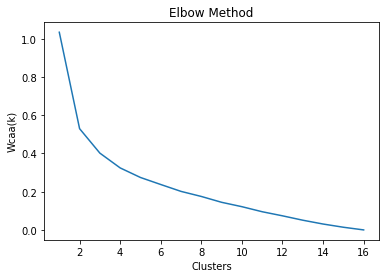

In [64]:
wcss = []
for i in range(1,17):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,17), wcss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Wcaa(k)")
plt.show()

In [65]:
kclusters = 7
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
kmeans.labels_[0:10] 

array([3, 0, 0, 3, 6, 1, 0, 1, 2, 6], dtype=int32)

In [66]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Azcapotzalco,Mexican Restaurant,Taco Place,Food Truck,Bakery,Pharmacy,Restaurant,Breakfast Spot,Ice Cream Shop,Gym / Fitness Center,Japanese Restaurant
1,0,Benito Juárez,Bakery,Taco Place,Ice Cream Shop,Mexican Restaurant,Coffee Shop,Park,Yoga Studio,Greek Restaurant,Japanese Restaurant,Pet Store
2,0,Coyoacán,Taco Place,Ice Cream Shop,Coffee Shop,Food Court,Soccer Field,Restaurant,Mexican Restaurant,Dog Run,Dance Studio,Park
3,3,Cuajimalpa de Morelos,Mexican Restaurant,Outdoors & Recreation,Historic Site,Mountain,Park,Taco Place,River,Farm,Moving Target,Diner
4,6,Cuauhtémoc,Mexican Restaurant,Art Museum,Taco Place,Ice Cream Shop,Plaza,Art Gallery,Concert Hall,Bed & Breakfast,Museum,History Museum
5,1,Gustavo A. Madero,Taco Place,Mexican Restaurant,Burger Joint,Ice Cream Shop,Gym,Café,Coffee Shop,Food,Fried Chicken Joint,Pool
6,0,Iztacalco,Racetrack,Taco Place,Mexican Restaurant,Music Venue,Stadium,Coffee Shop,Soccer Field,Restaurant,Bar,Bakery
7,1,Iztapalapa,Mexican Restaurant,Taco Place,Bakery,Restaurant,Burger Joint,Park,Fast Food Restaurant,Flea Market,Chinese Restaurant,Beer Garden
8,2,La Magdalena Contreras,Convenience Store,Soccer Field,Nature Preserve,Theme Park,Athletics & Sports,Mexican Restaurant,Memorial Site,Paintball Field,Rock Climbing Spot,Soccer Stadium
9,6,Miguel Hidalgo,Mexican Restaurant,Hotel,Ice Cream Shop,Jewelry Store,Concert Hall,Park,Gastropub,Department Store,Burger Joint,Café


In [149]:

Mexico_Merged = mexico_city_venues

Mexico_Merged = Mexico_Merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Mexico_Merged = Mexico_Merged.iloc[:,[0,3,4,5,6,7]]
Mexico_Merged

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,Azcapotzalco,La Conchería CDMX,19.483789,-99.185843,Bakery,3
1,Azcapotzalco,Café ONCE28,19.484427,-99.185720,Breakfast Spot,3
2,Azcapotzalco,La Perla Tapatía,19.483741,-99.185856,Mexican Restaurant,3
3,Azcapotzalco,Neko Café,19.484152,-99.183326,Japanese Restaurant,3
4,Azcapotzalco,Centro Verde Azcapotzalco,19.487757,-99.182125,Garden,3
...,...,...,...,...,...,...
709,Álvaro Obregón,Health Center,19.313338,-99.257880,Gym,0
710,Álvaro Obregón,Exhacienda Buenavista,19.328924,-99.293110,Lounge,0
711,Álvaro Obregón,El ErmitañoErmitaño,19.302932,-99.267179,Mountain,0
712,Álvaro Obregón,Little Ceasars Pizza,19.312614,-99.259415,Pizza Place,0


In [0]:
MX_geo = r'/content/drive/My Drive/Shapefiles/alcaldias .json'
map_mexico = folium.Map(location=[latitude, longitude], zoom_start=11)


In [151]:
#Create Choropleth map
map_mexico.choropleth(
    geo_data = MX_geo,
    data=df_covid,
    columns=['Borough','Results'],
    key_on = 'properties.nomgeo',
    fill_color = 'YlOrRd',
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Coronavirus México City'
)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Mexico_Merged['Venue Latitude'], Mexico_Merged['Venue Longitude'], Mexico_Merged['Venue'], Mexico_Merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mexico)    
map_mexico

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [152]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 0, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
50,Benito Juárez,Moyo,19.377340,-99.163604,Ice Cream Shop,0
51,Benito Juárez,Tokio Inc,19.380448,-99.165916,Japanese Restaurant,0
52,Benito Juárez,PETS Imaginarium,19.378203,-99.161628,Pet Store,0
53,Benito Juárez,Parque Arboledas,19.378311,-99.162229,Park,0
54,Benito Juárez,Restaurante Deigo,19.377988,-99.161629,Sushi Restaurant,0
...,...,...,...,...,...,...
709,Álvaro Obregón,Health Center,19.313338,-99.257880,Gym,0
710,Álvaro Obregón,Exhacienda Buenavista,19.328924,-99.293110,Lounge,0
711,Álvaro Obregón,El ErmitañoErmitaño,19.302932,-99.267179,Mountain,0
712,Álvaro Obregón,Little Ceasars Pizza,19.312614,-99.259415,Pizza Place,0


In [153]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 1, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
243,Gustavo A. Madero,Pastes Real de Plateros (La Escalera),19.512557,-99.141100,Mexican Restaurant,1
244,Gustavo A. Madero,La Casa de Toño,19.510625,-99.137548,Mexican Restaurant,1
245,Gustavo A. Madero,Tianguis de Acueducto,19.524766,-99.148800,Market,1
246,Gustavo A. Madero,Santa Clara,19.508856,-99.141745,Ice Cream Shop,1
247,Gustavo A. Madero,Vivero Paco,19.512931,-99.141689,Flower Shop,1
...,...,...,...,...,...,...
659,Xochimilco,Jardín Adelita,19.251980,-99.060317,Mexican Restaurant,1
660,Xochimilco,Tropicaliente,19.250226,-99.094938,Dive Bar,1
661,Xochimilco,Gym7,19.249605,-99.058042,Gym / Fitness Center,1
662,Xochimilco,micheladas bravas,19.247730,-99.056815,Brewery,1


In [154]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 2, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
393,La Magdalena Contreras,Segundo Dinamo,19.286371,-99.272958,Rock Climbing Spot,2
394,La Magdalena Contreras,La Virgen,19.254767,-99.267493,Memorial Site,2
395,La Magdalena Contreras,Gotchamania,19.264595,-99.240855,Paintball Field,2
396,La Magdalena Contreras,Gotcha Manía,19.254879,-99.244915,Theme Park,2
397,La Magdalena Contreras,"Parque y Corredor Ecoturístico ""Los Dínamos""",19.300540,-99.253412,Nature Preserve,2
398,La Magdalena Contreras,Cancha de Futbol (Deportivo Sánchez Taboada),19.282266,-99.236513,Soccer Field,2
399,La Magdalena Contreras,Gotchamanía,19.262875,-99.240130,Theme Park,2
400,La Magdalena Contreras,Campo De Soccer Hacienda,19.292383,-99.246857,Soccer Stadium,2
401,La Magdalena Contreras,Gotcha raptor,19.255486,-99.244761,Playground,2
402,La Magdalena Contreras,Lienzo Charro San Nicolas,19.296244,-99.248909,Plaza,2


In [155]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 3, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,Azcapotzalco,La Conchería CDMX,19.483789,-99.185843,Bakery,3
1,Azcapotzalco,Café ONCE28,19.484427,-99.185720,Breakfast Spot,3
2,Azcapotzalco,La Perla Tapatía,19.483741,-99.185856,Mexican Restaurant,3
3,Azcapotzalco,Neko Café,19.484152,-99.183326,Japanese Restaurant,3
4,Azcapotzalco,Centro Verde Azcapotzalco,19.487757,-99.182125,Garden,3
...,...,...,...,...,...,...
188,Cuajimalpa de Morelos,Ex Convento Carmelita Descalzos,19.312793,-99.311621,Historic Site,3
189,Cuajimalpa de Morelos,Restaurante Lety,19.312208,-99.311279,Mexican Restaurant,3
190,Cuajimalpa de Morelos,villa victoria,19.316623,-99.337990,River,3
191,Cuajimalpa de Morelos,La Marquesa ( El Zarco ),19.312805,-99.339778,Moving Target,3


In [156]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 4, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
462,Milpa Alta,Bethann Greenberg Photography,19.137181,-99.057133,Camera Store,4
463,Milpa Alta,"Aztec Wind Power - WeKnow Technologies, Inc.",19.131829,-99.052767,Factory,4


In [144]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 5, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
464,Tlalpan,19.28842,-99.167051,Centro Histórico de Tlalpan,19.288611,-99.167165,Neighborhood,5
465,Tlalpan,19.28842,-99.167051,Dolce Amore,19.287715,-99.166944,Italian Restaurant,5
466,Tlalpan,19.28842,-99.167051,La Tlalpeña,19.289184,-99.166694,Bar,5
467,Tlalpan,19.28842,-99.167051,Café Katsina,19.289512,-99.166320,Coffee Shop,5
468,Tlalpan,19.28842,-99.167051,Hacienda San Fernando,19.291154,-99.165317,Event Space,5
469,Tlalpan,19.28842,-99.167051,Antojitos Doña Chela,19.287997,-99.167126,Mexican Restaurant,5
470,Tlalpan,19.28842,-99.167051,Barrio Tlalpan,19.287382,-99.167000,Arcade,5
471,Tlalpan,19.28842,-99.167051,Santa Clara,19.286820,-99.163434,Ice Cream Shop,5
472,Tlalpan,19.28842,-99.167051,La Michoacana - Centro de Tlalpan,19.288423,-99.166772,Dessert Shop,5
473,Tlalpan,19.28842,-99.167051,Starbucks,19.282698,-99.164679,Coffee Shop,5


In [145]:
Mexico_Merged.loc[Mexico_Merged['Cluster Labels'] == 6, Mexico_Merged.columns[[0] + list(range(1, Mexico_Merged.shape[1]))]]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
193,Cuauhtémoc,19.441613,-99.151864,Museo Nacional de San Carlos,19.438369,-99.151880,Art Museum,6
194,Cuauhtémoc,19.441613,-99.151864,Museo Universitario del Chopo,19.441994,-99.156517,Museum,6
195,Cuauhtémoc,19.441613,-99.151864,Sushi Hoko-Ki,19.438078,-99.151252,Sushi Restaurant,6
196,Cuauhtémoc,19.441613,-99.151864,Terraza Timberland,19.436591,-99.152948,General Entertainment,6
197,Cuauhtémoc,19.441613,-99.151864,Casa Rivas Mercado,19.440926,-99.146706,Historic Site,6
...,...,...,...,...,...,...,...,...
457,Miguel Hidalgo,19.429614,-99.198639,El Palacio de Hierro,19.435301,-99.202115,Shopping Mall,6
458,Miguel Hidalgo,19.429614,-99.198639,El Palacio de los Palacios,19.435746,-99.201586,Department Store,6
459,Miguel Hidalgo,19.429614,-99.198639,Suntory,19.427439,-99.205282,Japanese Restaurant,6
460,Miguel Hidalgo,19.429614,-99.198639,Hyatt Regency Mexico City,19.427121,-99.192676,Hotel,6
